In [18]:
import pandas as pd

In [84]:
import numpy as np

# Load data
with np.load("features_train.npz", allow_pickle=False) as npz_file:
    df_train = dict(npz_file.items())
    

X = df_train["features"]
labels = df_train['labels']
y = np.argmax(labels,axis=-1)

Scree Plot

PCA analysis requires data to be standardized.

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
X_2d_rescaled = pca2.fit_transform(X_rescaled)

In [70]:
# Create DataFrame with variance and principal components
results_df2 = pd.DataFrame(
    {
        "variance": X_rescaled.var(axis=0),
        "1st component": pca2.components_[0],
        "2nd component": pca2.components_[1],
    }
)

# Sort DataFrame by the coefficients of the 1st loading vector
results_df2.sort_values("1st component", ascending=False)

,variance,1st component,2nd component
1234,1.000001,0.069954,-0.012925
1147,1.000000,0.069161,-0.011487
374,1.000000,0.066324,-0.016739
49,1.000000,0.065426,-0.002943
200,1.000000,0.065200,-0.023558
...,...,...,...
323,1.000001,-0.060842,-0.051800
1197,1.000000,-0.061627,-0.020838
172,0.999999,-0.061883,-0.010668
1129,1.000001,-0.062075,-0.014142


In [ ]:
vehicle_num = [0, 1, 2, 3, 4, 5]
vehicle_name = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
vehicle_cat = dict(zip(, test_values))

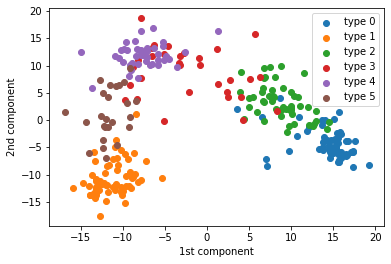

In [89]:


# Plot each kind of wine
for vehicle in [0, 1, 2, 3, 4 , 5]:
    # Wine samples of this type
    idx = y == vehicle

    # Plot their components
    plt.scatter(X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1], label="type {}".format(vehicle))

# Labels and legend
plt.legend()
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

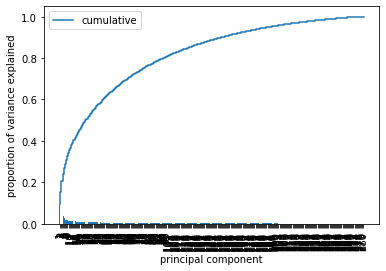

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create bar plot
xcor = np.arange(1, len(pve) + 1)  # 1,2,..,n_components
plt.bar(xcor, pve)
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor + 0.5,  # 1.5,2.5,..,n_components+0.5
    pve_cumsum,  # Cumulative sum
    label="cumulative",
)

# Add labels
plt.xlabel("principal component")
plt.ylabel("proportion of variance explained")
plt.xticks(rotation=90)
plt.legend()
plt.show()

32 PCA components explain approx 100% of the variance. (1 10%, 2 20%)